In this problem set we utilised AI tools, mainly chatGPT for debugging code as we did not find the error messages on Julia very intuitive as to where the problem was and what the problem was. Additionally, used chatGPT to create a template for making an animation.

## Problem 1

Part a

In [62]:
using Interpolations 
using Plots
using Optim

In [63]:
# Setting up the four functions
f1(x) = exp(2*x+2)
f2(x) = min(max(-1, 4*(x-1/5)), 1)
f3(x) = -2*x^(-1/2)
f4(x) = 1/(1+x^2)

# Setting up what is required for Lagrange interpolation
function vandermonde(X)
    n = length(X)
    V = [xi^s for xi in X, s in 0:n-1]
    return V
end

lagrange(X, y) = vandermonde(X)\y

function evaluate(a, x)
    xi = 1
    v  = 0.0
    for ai in a
        v += ai * xi 
        xi *= x
    end
    return v
end

# Setiting up what is required for Chebyshev polynomials
T(n, x) = cos(n * acos(x))



T (generic function with 1 method)

The only way I found of making sure the animations were shown was writing each animation in it's own box, this meant making a loop to do this was not possible as it would only show the last animation. I could not find anything online about this either. So even though it looks like a lot of code and very messy, it is only two different animations created, one comparing the interpolation to the actual curve and the other showing the errors. And I have just copied reused the two functions to create all the animations. Also I changed the n for the error going from n largest to n smallest as this changes the error size from smallest to largest.

In [64]:
gr()
fps = 1
# We found it looked better when we started off with a larger n then looked at it getting smaller.
grid_size = (5, 10, 20, 50, 100)
errors_grid_size = (100, 50, 20, 10, 5)
ranges = [[-1, 1], [-1, 1], [1e-12, 1], [-5, 5]]
function plot_f_gif(f, range, filename, type)
    p1 = plot(title = "$type Interpolation on $f", legend=:bottomright, linestyle=:dash)
    # Generate x values for plotting
    xg = LinRange(range[1], range[2], 1000)
    plot!(p1, xg, f, label = raw"$f(x)$", legend=false)
    anim = Animation()

    for (j, n) in enumerate(grid_size)

        # Generate interpolation points
        x = LinRange(range[1], range[2], n)
        y = f.(x)
        if type == "Lagrange"
            a = lagrange(x, y)
            plot!(p1, xg, x -> evaluate(a, x), label = "n=$n", legend=false)

        elseif type == "Chebyshev"
            # Plot with Chebyshev
            m = n + 1
            a_val = range[1]
            b_val = range[2]
            z = [-cos((2k - 1)/(2m) * π) for k in 1:m] # interpolation points
            x_cheb = (z .+ 1) .* (b_val - a_val)/2 .+ a_val
            y_cheb = f.(x_cheb)
            c = [sum(y_cheb[k] * T(i, z[k]) for k in 1:m) / sum(T(i, z[k])^2 for k in 1:m) for i in 0:n]

            approx_cheb(x) = sum(ci * T(i, 2 * (x - a_val)/(b_val - a_val) - 1) for (ci, i) in zip(c, 0:n))
            plot!(p1, xg, approx_cheb, label = "n=$n", legend=false)
            
        elseif type == "Linear"
            # Linear Interpolation
            itp_linear = interpolate((x, ), y, Gridded(Linear()))
            plot!(p1, xg, itp_linear(xg), label = "n=$n", legend=false)

        elseif type == "Cubic"
            # Cubic Splines
            f̂ = CubicSplineInterpolation(x, y) 
            plot!(p1, xg, f̂.(xg), label = "n=$n", legend=false)
        end
        
        # Reset legend
        plot!(p1, legend=:bottomright)
        
        frame(anim)  # Save the frame
    end
    gif(anim, filename, fps=fps)  # Convert frames to animated gif

end

plot_f_gif (generic function with 1 method)

In [65]:
function plot_error_gif(f, range, filename, type)
    
    # Generate x values for plotting
    p2 = plot(title = "Error in $type interpolation on $f")
    xg = LinRange(range[1], range[2], 1000)
    anim = Animation()

    for (j, n) in enumerate(errors_grid_size)
        # Generate interpolation points
        x = LinRange(range[1], range[2], n)
        y = f.(x)

        if type == "Lagrange"
            a = lagrange(x, y)

            error_lagrange = f.(x) .- evaluate.(Ref(a), x)
            plot!(p2, x, error_lagrange, label="Error for n=$n", linestyle=:dash)

        elseif type == "Chebyshev"
            # Plot with Chebyshev
            m = n + 1
            a_val = range[1]
            b_val = range[2]
            z = [-cos((2k - 1)/(2m) * π) for k in 1:m] # interpolation points
            x_cheb = (z .+ 1) .* (b_val - a_val)/2 .+ a_val
            y_cheb = f.(x_cheb)
            c = [sum(y_cheb[k] * T(i, z[k]) for k in 1:m) / sum(T(i, z[k])^2 for k in 1:m) for i in 0:n]

            approx_cheb(x) = sum(ci * T(i, 2 * (x - a_val)/(b_val - a_val) - 1) for (ci, i) in zip(c, 0:n))

            error_cheb = f.(xg) .- approx_cheb.(xg)
            plot!(p2, xg, error_cheb, label="Error for n=$n", linestyle=:dash)
        
        elseif type == "Linear"
            # Linear Interpolation
            itp_linear = interpolate((x, ), y, Gridded(Linear()))

            error_linear = f.(xg) .- itp_linear(xg)
            plot!(p2, xg, error_linear, label="Error for n=$n", linestyle=:dash)

        elseif type == "Cubic"
            # Cubic Splines
            f̂ = CubicSplineInterpolation(x, y) 

            error_cubic = f.(xg) .- f̂(xg)
            plot!(p2, xg, error_cubic, label="Error for n=$n", linestyle=:dash)

        end
        # Reset legend
        plot!(p2, legend=:bottomright)
        
        frame(anim)  # Save the frame

end

gif(anim, filename, fps=fps)  # Convert frames to animated gif
end

plot_error_gif (generic function with 1 method)

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_lagrange.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_lagrange.gif")
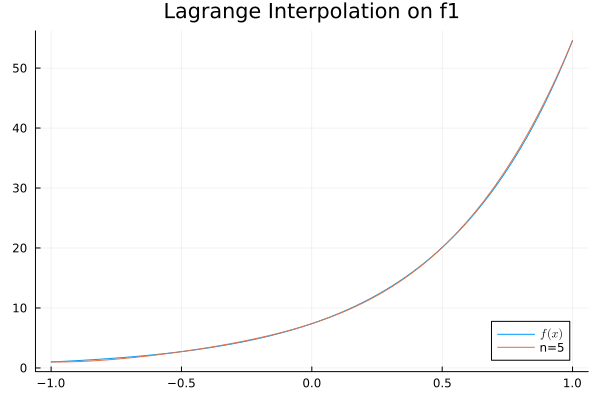

In [66]:
plot_f_gif(f1, ranges[1], "f1_lagrange.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_lagrange_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_lagrange_error.gif")
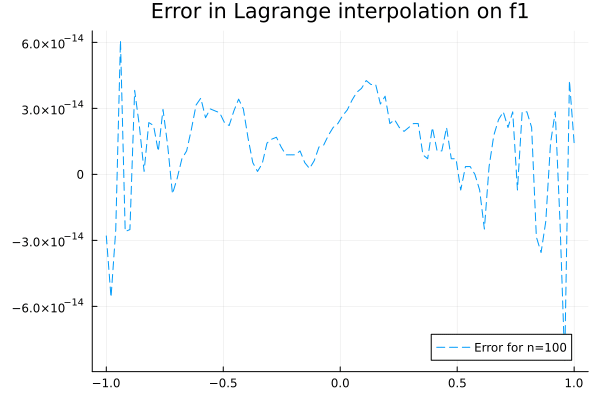

In [67]:
plot_error_gif(f1, ranges[1], "f1_lagrange_error.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_lagrange.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_lagrange.gif")
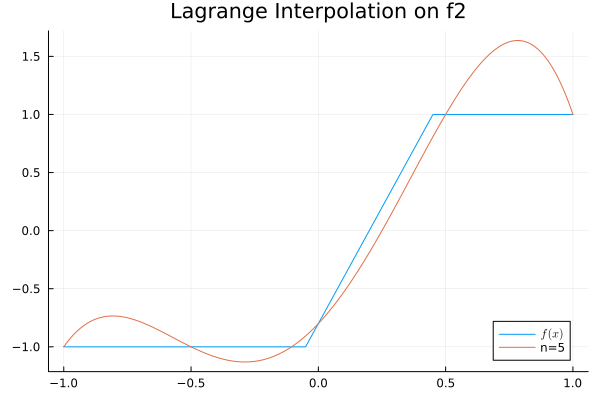

In [68]:
plot_f_gif(f2, ranges[2], "f2_lagrange.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_lagrange_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_lagrange_error.gif")
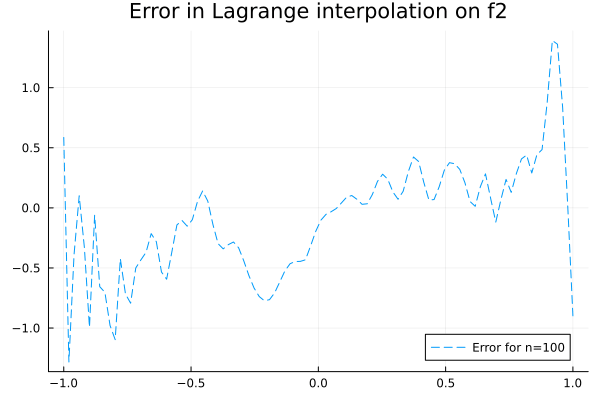

In [69]:
plot_error_gif(f2, ranges[2], "f2_lagrange_error.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_lagrange.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_lagrange.gif")
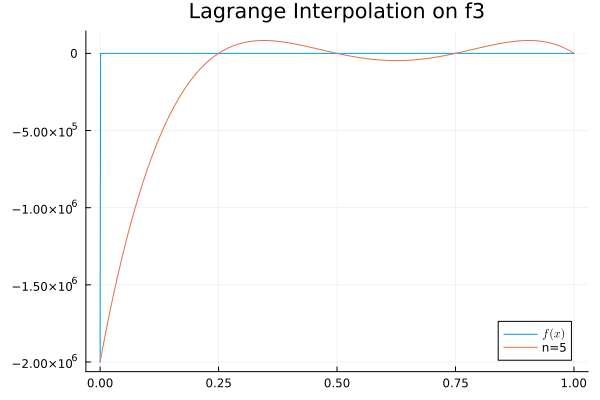

In [70]:
plot_f_gif(f3, ranges[3], "f3_lagrange.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_lagrange_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_lagrange_error.gif")
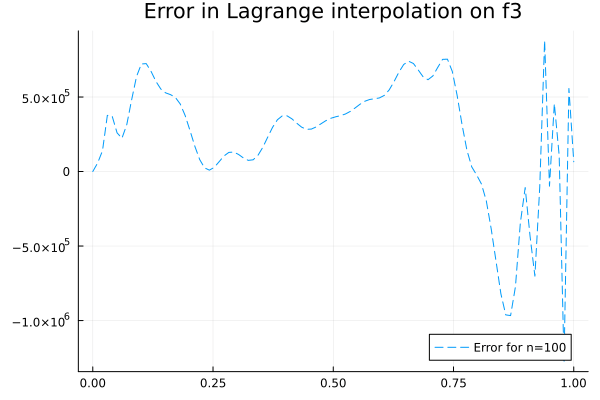

In [71]:
plot_error_gif(f3, ranges[3], "f3_lagrange_error.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_lagrange.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_lagrange.gif")
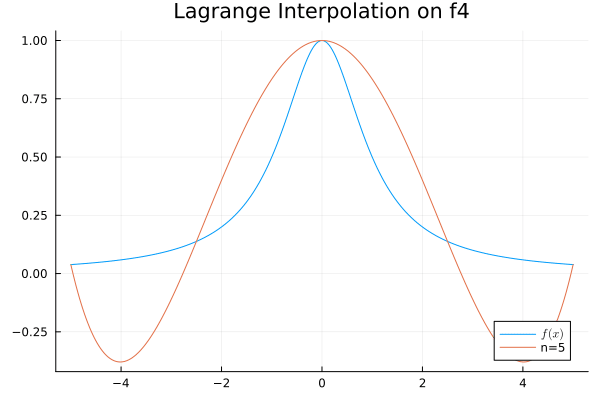

In [72]:
plot_f_gif(f4, ranges[4], "f4_lagrange.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_lagrange_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_lagrange_error.gif")
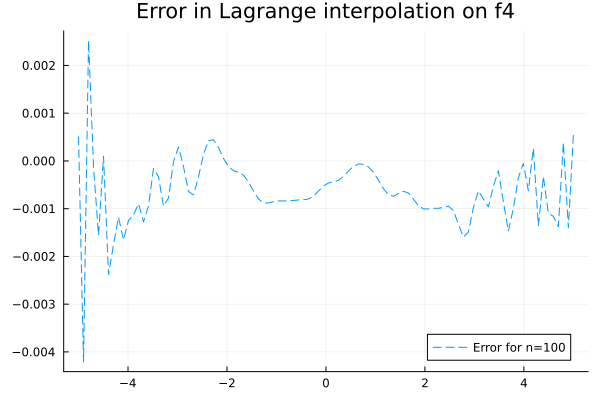

In [73]:
plot_error_gif(f4, ranges[4], "f4_lagrange_error.gif", "Lagrange")

For the Lagrange polynomials, we see divergent behaviour in the deviations from the actual value of f(x) as n increases with very large osciallations at the bounds. It can be shown that the Lagrange interpolation will never converge, and increasing n does not fix the problem, this is known the the Runge phenomenom. We can see that increasing n actually makes the problem worse in most cases.

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_chebyshev.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_chebyshev.gif")
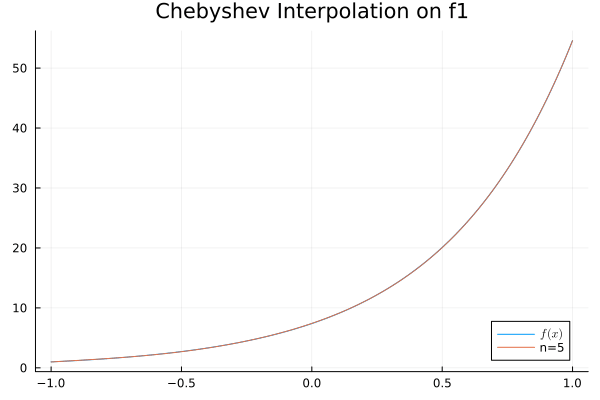

In [74]:
plot_f_gif(f1, ranges[1], "f1_chebyshev.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_chebyshev_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_chebyshev_error.gif")
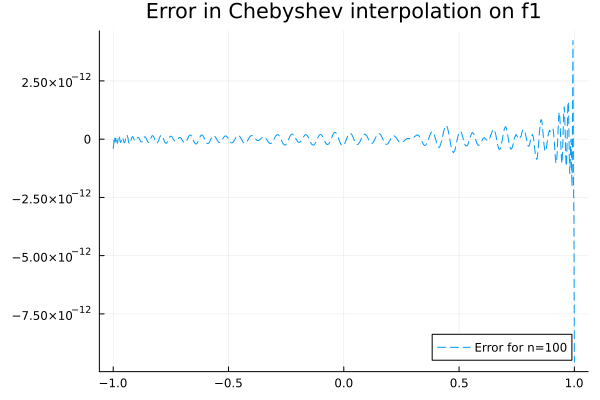

In [75]:
plot_error_gif(f1, ranges[1], "f1_chebyshev_error.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_chebyshev.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_chebyshev.gif")
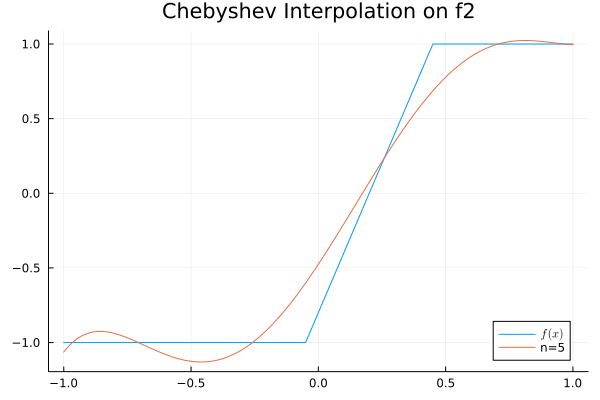

In [76]:
plot_f_gif(f2, ranges[2], "f2_chebyshev.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_chebyshev_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_chebyshev_error.gif")
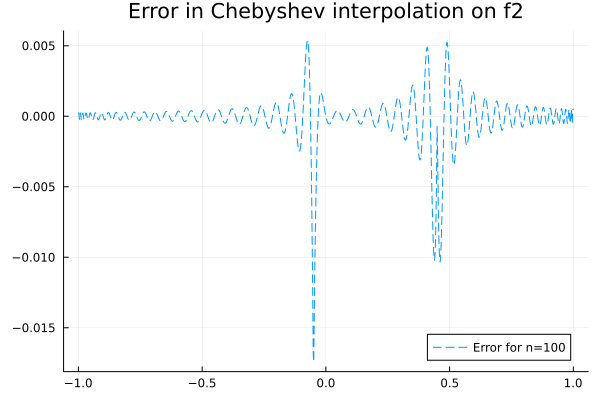

In [77]:
plot_error_gif(f2, ranges[2], "f2_chebyshev_error.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_chebyshev.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_chebyshev.gif")
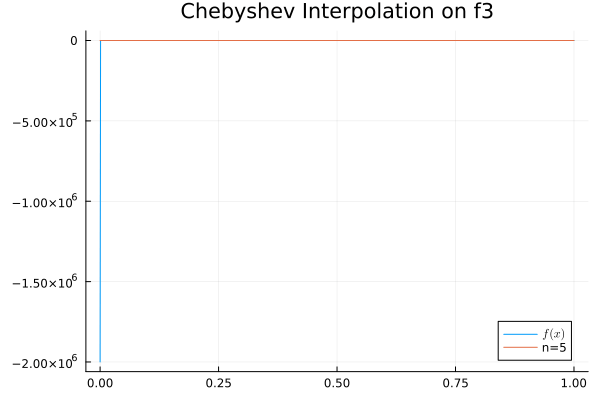

In [78]:
plot_f_gif(f3, ranges[3], "f3_chebyshev.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_chebyshev_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_chebyshev_error.gif")
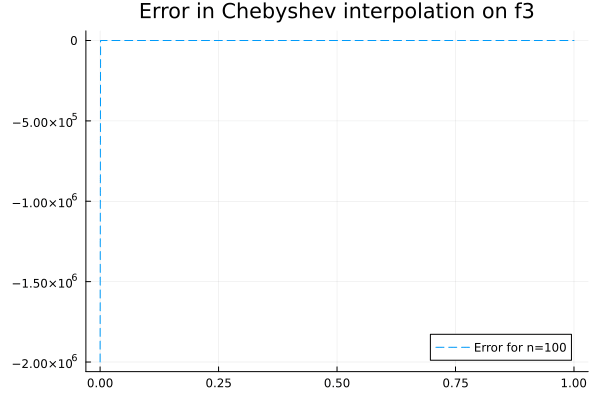

In [79]:
plot_error_gif(f3, ranges[3], "f3_chebyshev_error.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_chebyshev.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_chebyshev.gif")
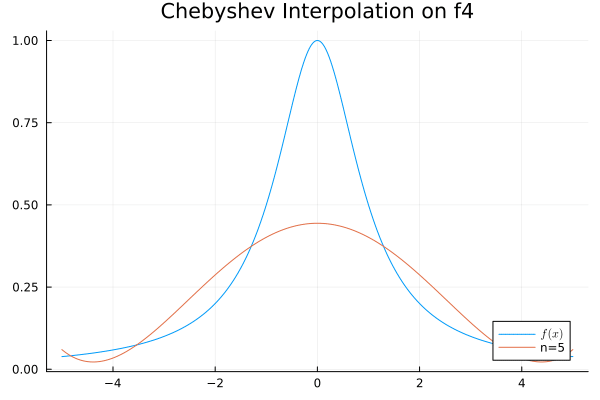

In [80]:
plot_f_gif(f4, ranges[4], "f4_chebyshev.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_chebyshev_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_chebyshev_error.gif")
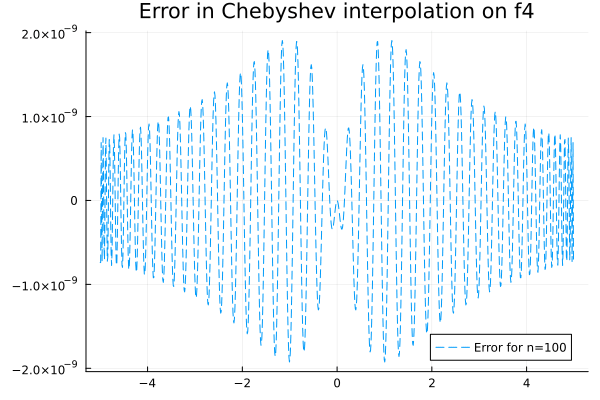

In [81]:
plot_error_gif(f4, ranges[4], "f4_chebyshev_error.gif", "Chebyshev")

The error pattern exhibits a consistent trend regardless of the value of n, yet as n increases, the number of inflections on the curve tends to vary. Chebyshev interpolation, leveraging the roots of Chebyshev polynomials, offers a distinct advantage in minimizing oscillation and enhancing stability, resulting in a smoother curve approximation compared to other interpolation methods. Consequently, with larger n values, the error diminishes as expected, reflecting the enhanced precision achieved through the utilisation of Chebyshev nodes. This reduction in error underscores the effectiveness of Chebyshev interpolation in providing accurate approximations, especially noticeable in scenarios where oscillatory behavior may pose challenges for other interpolation techniques.

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_linear.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_linear.gif")
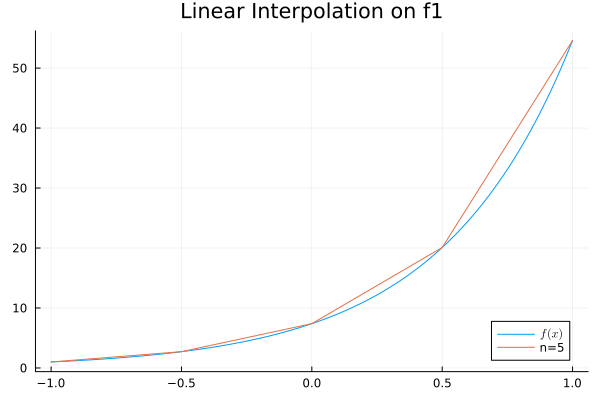

In [82]:
plot_f_gif(f1, ranges[1], "f1_linear.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_linear_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_linear_error.gif")
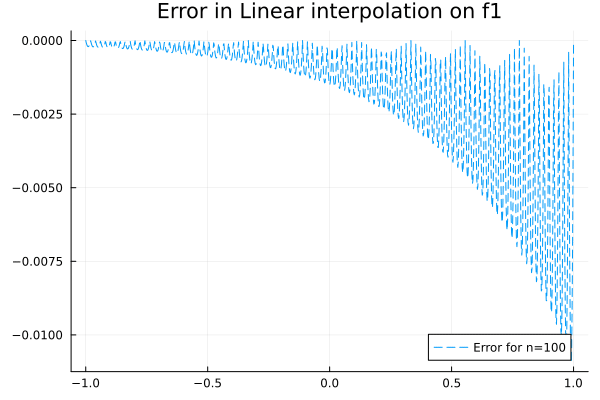

In [83]:
plot_error_gif(f1, ranges[1], "f1_linear_error.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_linear.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_linear.gif")
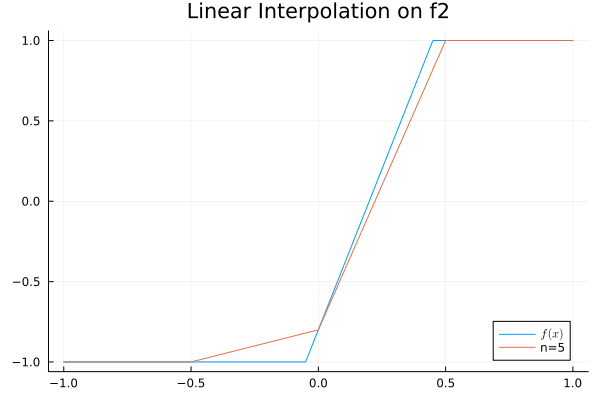

In [84]:
plot_f_gif(f2, ranges[2], "f2_linear.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_linear_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_linear_error.gif")
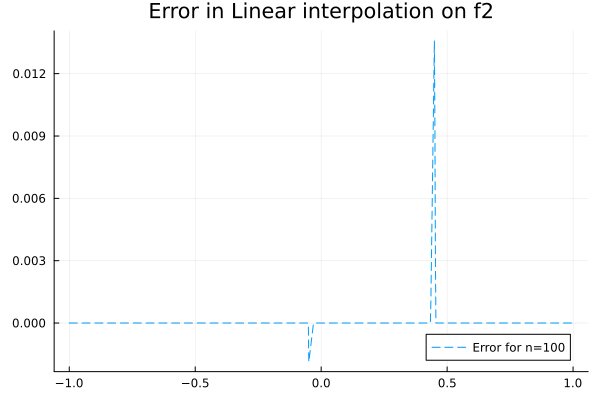

In [85]:
plot_error_gif(f2, ranges[2], "f2_linear_error.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_linear.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_linear.gif")
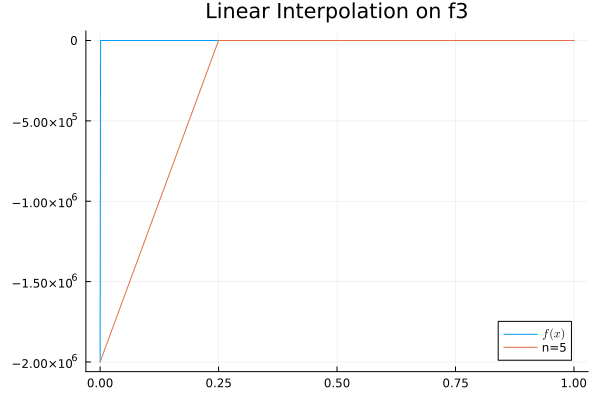

In [86]:
plot_f_gif(f3, ranges[3], "f3_linear.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_linear_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_linear_error.gif")
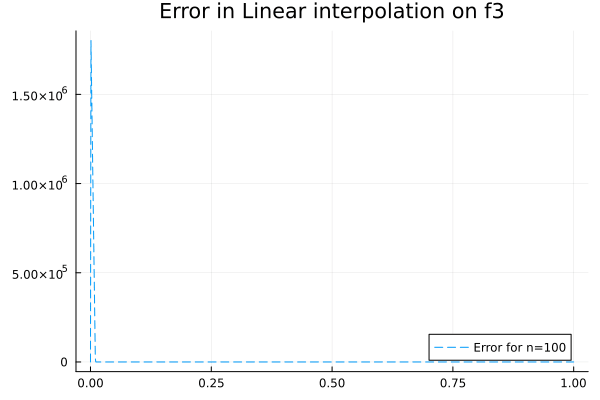

In [87]:
plot_error_gif(f3, ranges[3], "f3_linear_error.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_linear.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_linear.gif")
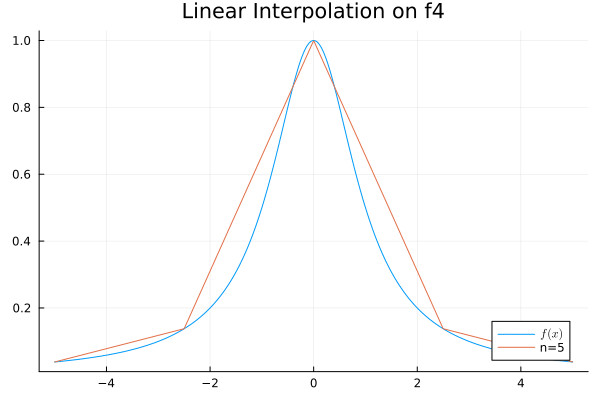

In [88]:
plot_f_gif(f4, ranges[4], "f4_linear.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_linear_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_linear_error.gif")
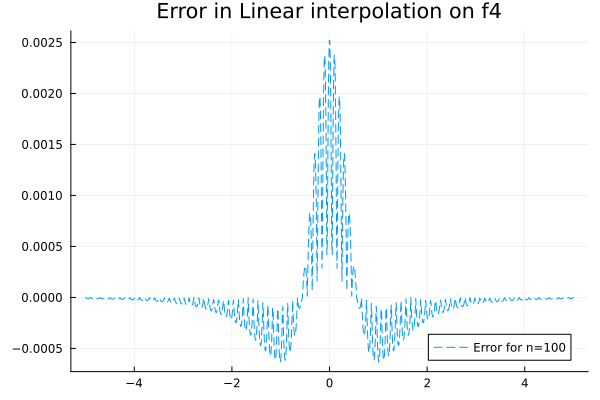

In [89]:
plot_error_gif(f4, ranges[4], "f4_linear_error.gif", "Linear")

The error pattern remains consistent across varying values of n, yet with higher n values, the curve tends to display more inflections compared to cubic interpolation. This outcome arises due to the linear nature of the interpolation method, which results in a smoother curve approximation. Despite the relatively simpler nature of linear interpolation, as n increases, the error tends to decrease as well, in accordance with our expectations. This reduction in error with larger n values highlights the improvement in precision achieved through denser point evaluation, although not as pronounced as in cubic interpolation due to the linear interpolation's inherently limited complexity.

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_cubic.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_cubic.gif")
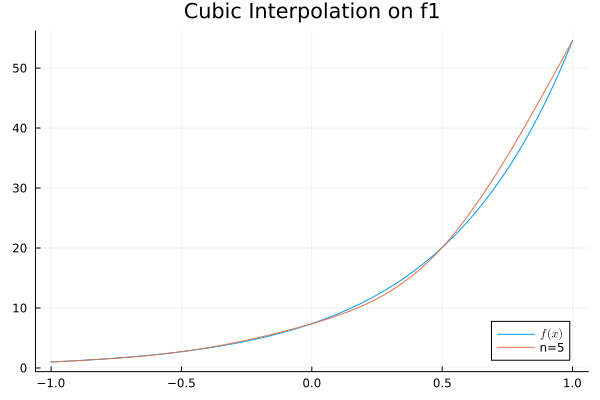

In [90]:
plot_f_gif(f1, ranges[1], "f1_cubic.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_cubic_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_cubic_error.gif")
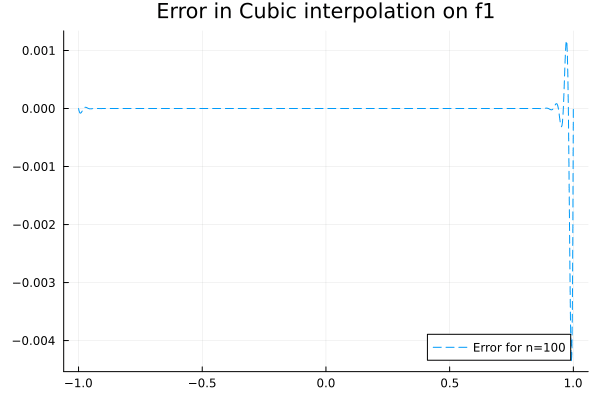

In [91]:
plot_error_gif(f1, ranges[1], "f1_cubic_error.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_cubic.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_cubic.gif")
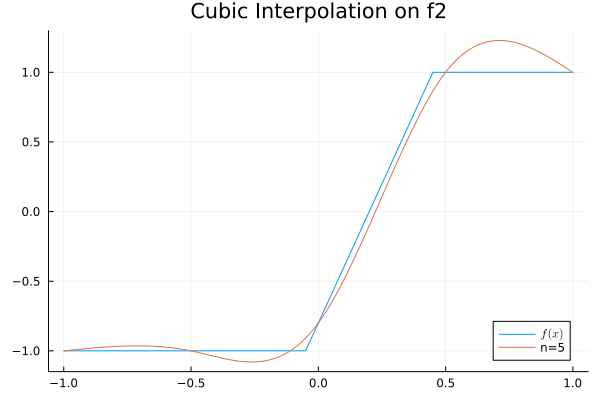

In [92]:
plot_f_gif(f2, ranges[2], "f2_cubic.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_cubic_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_cubic_error.gif")
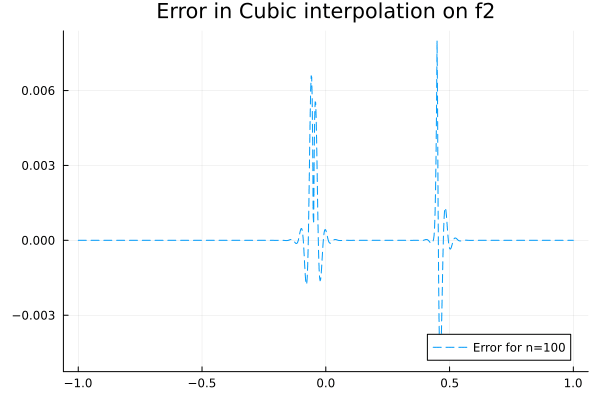

In [93]:
plot_error_gif(f2, ranges[2], "f2_cubic_error.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_cubic.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_cubic.gif")
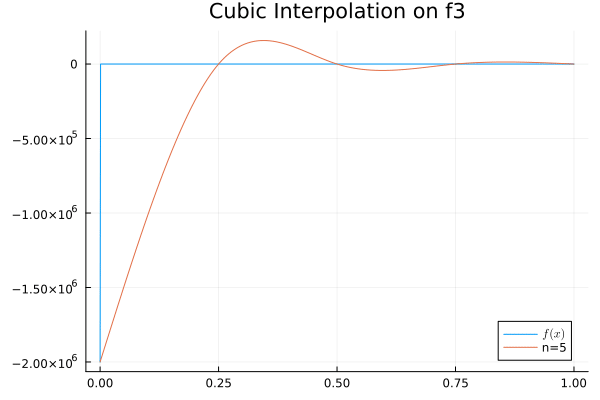

In [94]:
plot_f_gif(f3, ranges[3], "f3_cubic.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_cubic_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_cubic_error.gif")
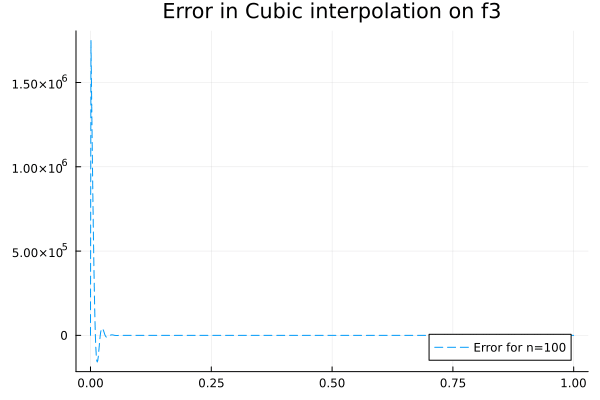

In [95]:
plot_error_gif(f3, ranges[3], "f3_cubic_error.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_cubic.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_cubic.gif")
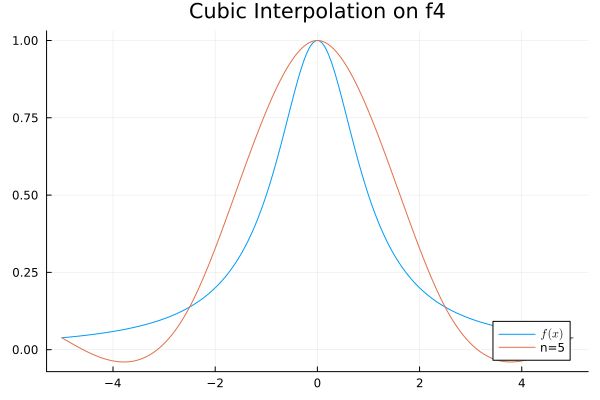

In [96]:
plot_f_gif(f4, ranges[4], "f4_cubic.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_cubic_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_cubic_error.gif")
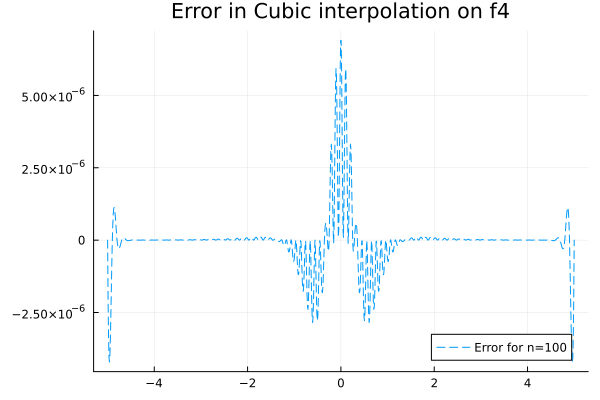

In [97]:
plot_error_gif(f4, ranges[4], "f4_cubic_error.gif", "Cubic")

The errors exhibit a similar pattern consistently; however, as the value of n increases, more inflections appear on the curve. This proliferation of inflections is attributed to the increased number of points evaluated in the interpolation process. Notably, for larger values of n, the error diminishes, aligning with our expectations. This reduction in error with larger n values reflects the finer granularity achieved through increased point evaluation, resulting in a more accurate approximation.

Part b

In [98]:
function errors_f(f, n, a, b)
    errors_lagrangian = []
    errors_cheb = []
    errors_linear = []
    errors_cubic = []
    for n_value in n
        # Generate evaluation points
        xg = LinRange(a, b, 1000)
        x = LinRange(a, b, n_value)
        y = f.(x)
        # Lagrange Interpolation
        approx_lagrange = lagrange(x, y)
        interp_lagrange_values = evaluate.(Ref(approx_lagrange), xg)
        error_lagrange = sum(abs2, f.(xg) .- interp_lagrange_values) / 1000
        push!(errors_lagrangian, error_lagrange)

        # Chebyshev Interpolation
        m = n_value + 1
        z = [cos((2k - 1)/(2m) * π) for k in 1:m]
        x_cheb = (z .+ 1) .* (b - a) / 2 .+ a
        y_cheb = f.(x_cheb)
        c = [sum(y_cheb[k] * T(i, z[k]) for k in 1:m) / sum(T(i, z[k])^2 for k in 1:m) for i in 0:n_value]
        approx_cheb(x) = sum(ci * T(i, 2 * (x - a) / (b - a) - 1) for (ci, i) in zip(c, 0:n_value))
        error_cheb = sum(abs2, f.(xg) .- approx_cheb.(xg)) / 1000
        push!(errors_cheb, error_cheb)


        # Linear Interpolation
        itp_linear = interpolate((x,), y, Gridded(Linear()))
        error_linear = sum(abs2, f.(xg) .- itp_linear(xg)) / 1000
        push!(errors_linear, error_linear)

        # Cubic Splines Interpolation
        f̂ = CubicSplineInterpolation(x, y)
        error_cubic = sum(abs2, f.(xg) .- f̂.(xg)) / 1000
        push!(errors_cubic, error_cubic)
    end  
    return errors_lagrangian, errors_cheb, errors_linear, errors_cubic
end

errors_f (generic function with 1 method)

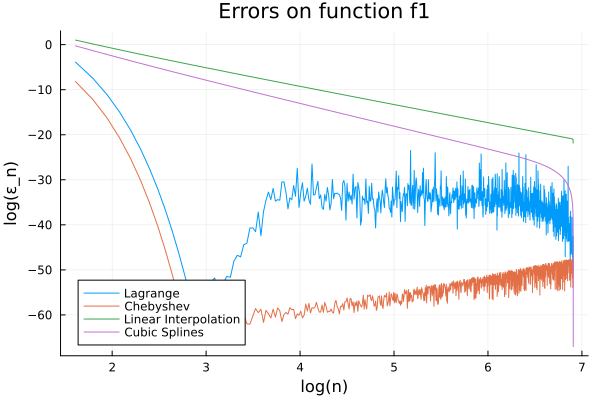

In [99]:
n = [i for i in 5:1000]
# For f1
lagrange_error, cheb_error, linear_error, cubic_error = errors_f(f1, n, -1, 1)
p = plot(title = "Errors on function f1")
plot!(log.(n), log.(lagrange_error), label="Lagrange")
plot!(log.(n), log.(cheb_error), label="Chebyshev")
plot!(log.(n), log.(linear_error), label="Linear Interpolation")
plot!(log.(n), log.(cubic_error), label="Cubic Splines")

xlabel!("log(n)")
ylabel!("log(ε_n)")
display(p)

The slopes of the lines in the log-log plots offer valuable insights into the convergence rates of the approximation methods employed. A steeper negative slope indicates a faster convergence rate, implying that the error decreases more rapidly as the number of data points (ε_n) increases. Conversely, a shallower negative slope suggests a slower convergence rate, indicating that the method requires a larger number of data points to achieve comparable levels of error reduction. Analysing the slopes across different methods applied to various functions allows us to discern the relative efficacy and efficiency of each method in approximating the underlying functions. Moreover, understanding the convergence behaviour elucidated by the slopes aids in selecting the most suitable approximation method for a given application or problem domain.

Given the graph for the different approximation methods on f1, we see that for almost all n Chebyshev interpolation is the most accurate method, and it decreases rapidly from the start. Cubic splines then becomes the most accurate method when we have nearly reached 1000, where the slope is extremely negative showing rapid convergence towards the actual value of f1.

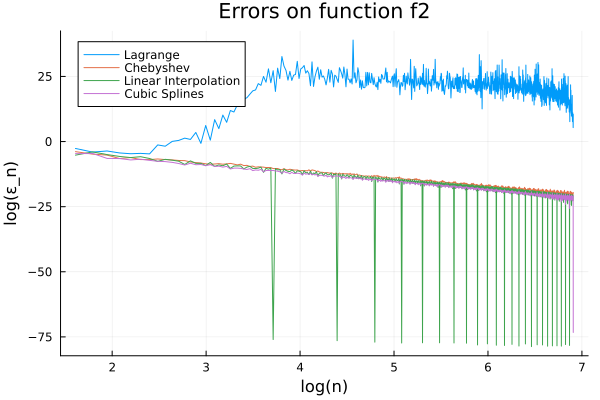

In [100]:
# For f2
lagrange_error, cheb_error, linear_error, cubic_error = errors_f(f2, n, -1, 1)
p = plot(title = "Errors on function f2")
plot!(log.(n), log.(lagrange_error), label="Lagrange")
plot!(log.(n), log.(cheb_error), label="Chebyshev")
plot!(log.(n), log.(linear_error), label="Linear Interpolation")
plot!(log.(n), log.(cubic_error), label="Cubic Splines")

xlabel!("log(n)")
ylabel!("log(ε_n)")
display(p)

On this graph of function f2, we can see that apart from right at the start the Lagrange method is the least accurate method. Interestingly the linear method suddenly jumps down indicating it is close to the real f2, then jjmps back up to where it was following a slow negative trend. Chebyshev and Cubic methods are continually getting more accurate as n increase. What is very interesting is that the Cubic method suddenly decreases rapidly when we are close to n equal to 1000.

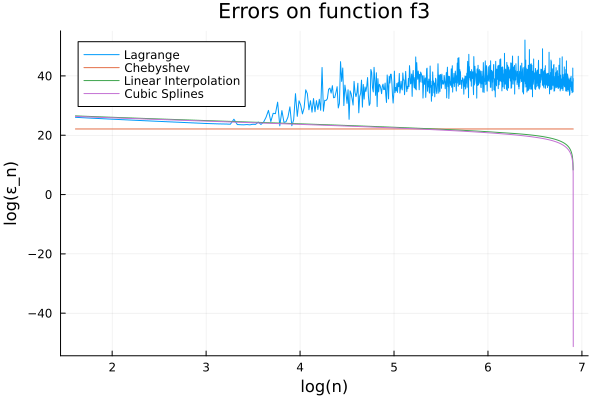

In [101]:
# For f3 not working because at 0, f3 is -infinity so using 1e-12 instead to replicate 0
lagrange_error, cheb_error, linear_error, cubic_error = errors_f(f3, n, 1e-12, 1)
p = plot(title = "Errors on function f3")
plot!(log.(n), log.(lagrange_error), label="Lagrange")
plot!(log.(n), log.(cheb_error), label="Chebyshev")
plot!(log.(n), log.(linear_error), label="Linear Interpolation")
plot!(log.(n), log.(cubic_error), label="Cubic Splines")

xlabel!("log(n)")
ylabel!("log(ε_n)")

display(p)

On this graph we can see the Cehbyshev method initially starts the best and it gradually getting more accurate for all n. The Lagrange method appears to be getting less accurate as n increases. Interestingly the Linear and Cubic method both get very accurate when n is close to 1000, with the Cubic methof being a bit more accurate for each n.

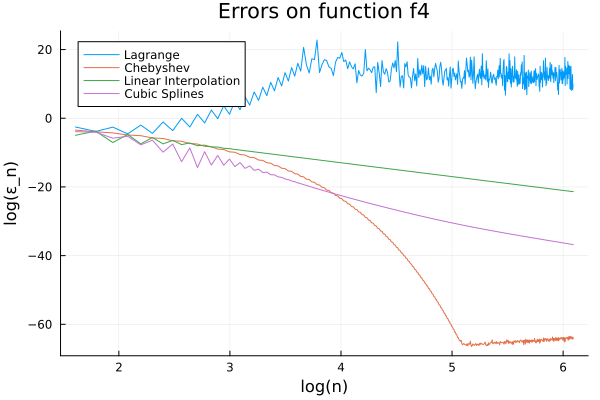

In [102]:
# For f4
# Lagrange method stops working after n greater than 442
n = [i for i in 5:442]

lagrange_error, cheb_error, linear_error, cubic_error = errors_f(f4, n, -5, 5)
p = plot(title = "Errors on function f4")
plot!(log.(n), log.(lagrange_error), label="Lagrange")
plot!(log.(n), log.(cheb_error), label="Chebyshev")
plot!(log.(n), log.(linear_error), label="Linear Interpolation")
plot!(log.(n), log.(cubic_error), label="Cubic Splines")

xlabel!("log(n)")
ylabel!("log(ε_n)")

display(p)

Because we were forced to stop before n equals 1000, we cannot tell if the Cubic method or the Linear method suddently get increasingly accurate at the end. However, from what we have Chebyshev is the most accurate method as n gets large.

## Problem 2

Part a

In [103]:
# Define parameters
a = -10
b = 0.5
alpha = 1/2
beta = 0.9

# Define the function v(k)
function v(k,; a=-10.0, b=0.5)
    return a + b * log(k)
end

# Define the optimization problem
function optimization_problem(k_prime, k,; a=-10.0, b=0.5, alpha=1/2, beta=0.9)
    # k_prime is initially in an array so making sure we are just calling the number
    k_prime = k_prime[1]
    c = k^alpha - k_prime
    return - (log(c) + beta * v(k_prime, a=a, b=b))
end

# Define the minimizer function
function minimiser(k,; a=-10.0, b=0.5, alpha=1/2)
    k_prime_init = [0.5 * k^alpha]
    lower_bounds = [0.0]
    upper_bounds = [k^alpha]
    function_to_minimise = k_prime -> optimization_problem(k_prime, k, a=a, b=b)
    result = optimize(function_to_minimise, lower_bounds, upper_bounds, k_prime_init)
    # Returning optimal c, k_prime
    c_optimal = k^alpha - result.minimizer[1]
    return (-result.minimum, result.minimizer[1])
end


minimiser (generic function with 1 method)

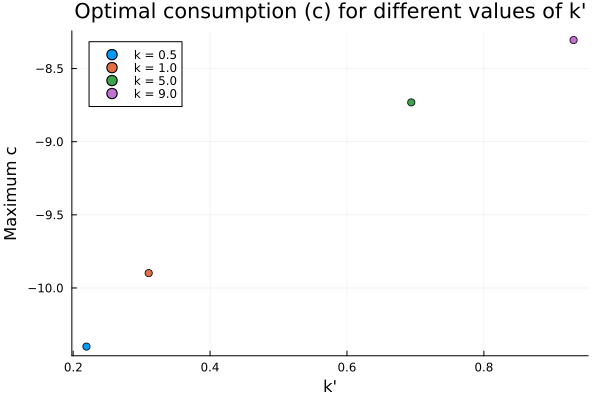

In [104]:
# Test the function for different values of k
k_values = [0.5, 1, 5, 9]
plot()
for k in k_values
    max, k_prime_optimal = minimiser(k)
    scatter!([k_prime_optimal], [max], label="k = $k", xlabel="k'", ylabel="Maximum c")
end
plot!(title="Optimal consumption (c) for different values of k'")

Part b

In [105]:
function chebyshev_interpolation_v(k, n)
    # Generate evaluation points
    x = LinRange(1e-6, 10, n)
    y = v.(x)

    m = n + 1
    a_val = 1e-6
    b_val = 10
    z = [-cos((2k - 1)/(2m) * π) for k in 1:m] # interpolation points

    x_cheb = (z .+ 1) .* (b_val - a_val)/2 .+ a_val
    y_cheb = v.(x_cheb)
    c = [sum(y_cheb[k] * T(i, z[k]) for k in 1:m) / sum(T(i, z[k])^2 for k in 1:m) for i in 1:m]
    approx_cheb(x) = sum(ci * T(i, 2 * (x - 1e-6) ./ (10 - 1e-6) -1) for (ci, i) in zip(c, 1:m))

    return approx_cheb
end



function linear_interpolation_v(k, n)
    x = LinRange(1e-4, 10, n)
    y = v.(x)
    return interpolate((x,), y, Gridded(Linear()))
end

function cubic_interpolation_v(k, n)
    x = LinRange(1e-6, 10, n)
    y = v.(x)
    return CubicSplineInterpolation(x, y)
end
# Define the optimization problem
function optimization_problem_v_hat(k_prime, k, method, n, alpha=1/2, beta=0.9)
    # k_prime is initially in an array so making sure we are just calling the number
    k_prime = k_prime[1]
    c = k^alpha - k_prime

    approx_method = method(k_prime, n)
    #println(approx_method)
    return - (log(c) + beta * approx_method(k_prime))
end

# Define the minimizer function
function minimiser_v_hat(k, method, n, alpha=1/2)
    k_prime_init = [0.5 * k^alpha]
    lower_bounds = [0.0]
    upper_bounds = [k^alpha]
    function_to_minimise = k_prime -> optimization_problem_v_hat(k_prime, k, method, n)
    result = optimize(function_to_minimise, lower_bounds, upper_bounds, k_prime_init)
    # Returning optimal c, k_prime
    c_optimal = k^alpha - result.minimizer[1]
    return (-result.minimum, result.minimizer[1])
end


minimiser_v_hat (generic function with 2 methods)

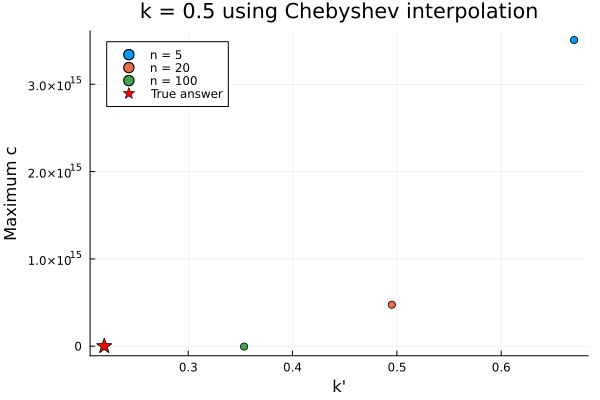

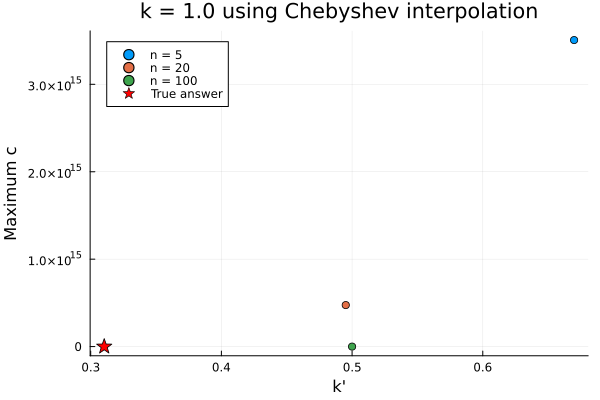

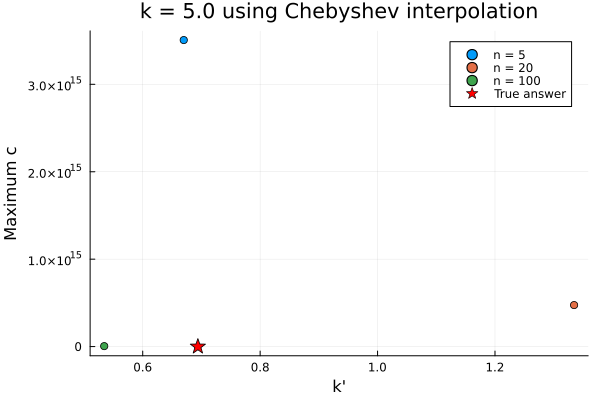

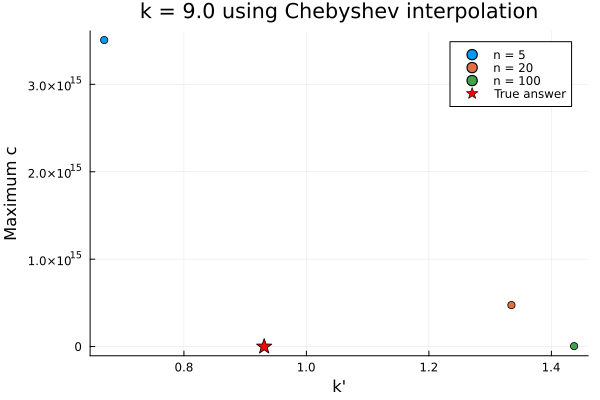

In [106]:

# Test the function for different values of k
k_values = [0.5, 1, 5, 9]
n_values = [5, 20, 100]

for k in k_values
    p = plot()
    for n in n_values
        max, k_prime_optimal = minimiser_v_hat(k, chebyshev_interpolation_v, n)
        scatter!([k_prime_optimal], [max], label="n = $n", xlabel="k'", ylabel="Maximum c")
    end
    real_max, real_k_prime_optimal = minimiser(k)
    scatter!([real_k_prime_optimal], [real_max], label="True answer", xlabel="k'", ylabel="Maximum c", shape=:star5, markersize=8, color=:red)
    plot!(title="k = $k using Chebyshev interpolation")
    display(p)
end


From the graphs it appears as the Chebyshev method does not get increasing more accurate as n increases, however we believe this is due to our implementation of the Chebyshev interpolation but we could not see how to fix it. From this graph it appears that when k increases it is harder for our algorithm to become accurate.

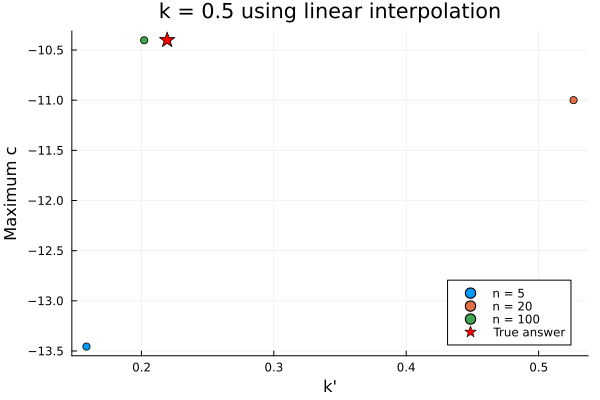

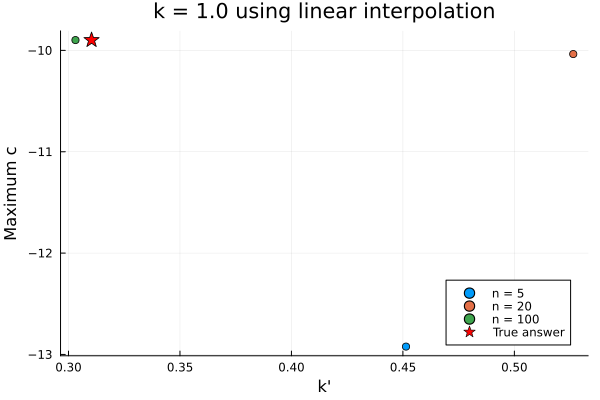

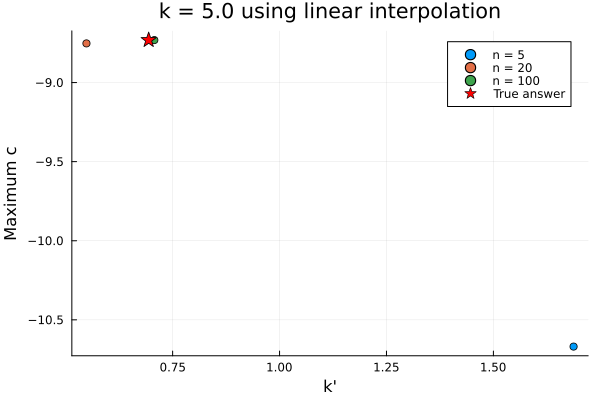

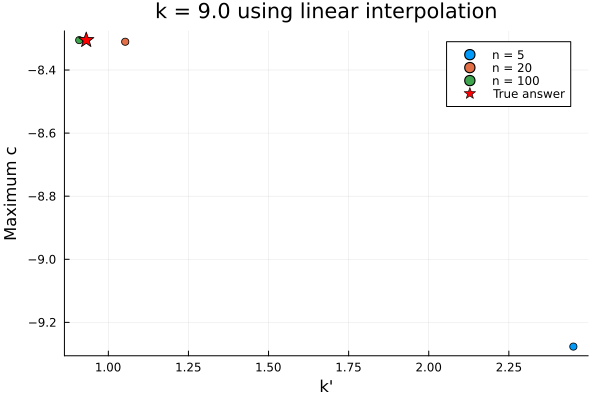

In [107]:
for k in k_values
    p = plot()
    for n in n_values
        max, k_prime_optimal = minimiser_v_hat(k, linear_interpolation_v, n)
        scatter!([k_prime_optimal], [max], label="n = $n", xlabel="k'", ylabel="Maximum c")
    end
    real_max, real_k_prime_optimal = minimiser(k)
    scatter!([real_k_prime_optimal], [real_max], label="True answer", xlabel="k'", ylabel="Maximum c", shape=:star5, markersize=8, color=:red)
    plot!(title="k = $k using linear interpolation")
    display(p)
end

Here we see that Linear interpolation approximates the true value of k quite well, espicically when n gets large. For example, when n = 100 it is very close to the true value, espicially when the initial k is greater, with smaller initial k it is still accurate but a bit less accurate.

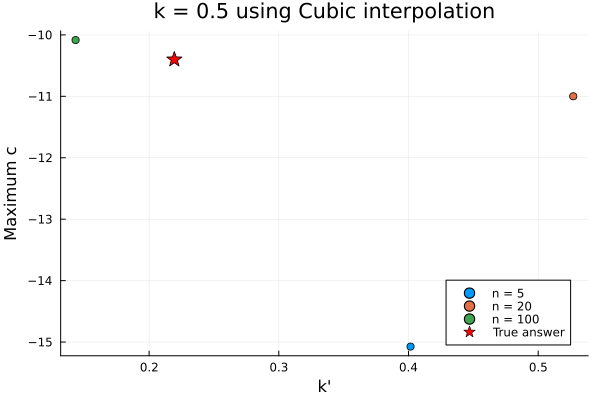

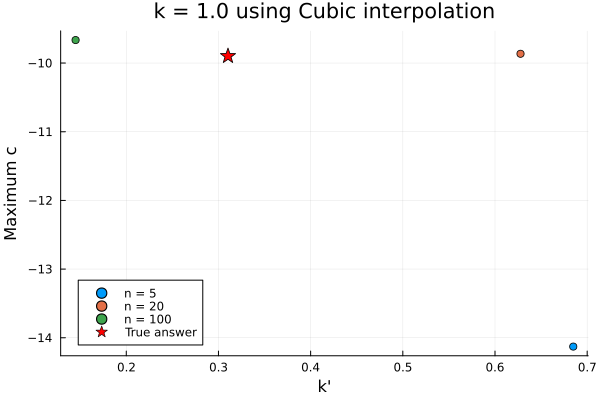

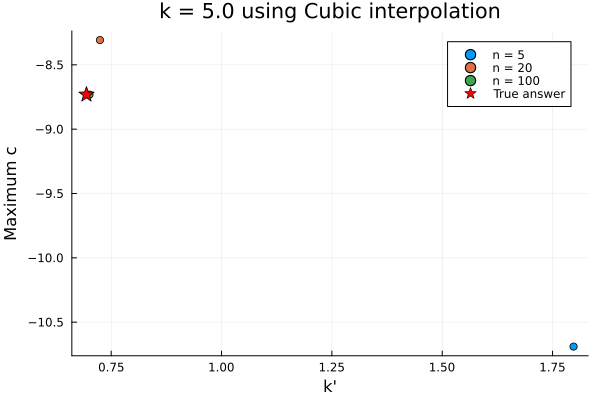

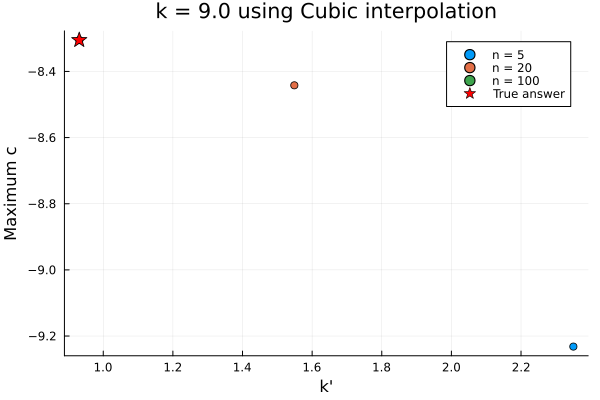

In [108]:
for k in k_values
    p = plot()
    for n in n_values
        max, k_prime_optimal = minimiser_v_hat(k, cubic_interpolation_v, n)
        scatter!([k_prime_optimal], [max], label="n = $n", xlabel="k'", ylabel="Maximum c")
    end
    real_max, real_k_prime_optimal = minimiser(k)
    scatter!([real_k_prime_optimal], [real_max], label="True answer", xlabel="k'", ylabel="Maximum c", shape=:star5, markersize=8, color=:red)
    plot!(title="k = $k using Cubic interpolation")
    display(p)
end

As k gets larger the Cubic approximation method gets significantly better, however when k is small it does not perform very well even for large n. So when k is large and n is large the Cubic method approximates the true value well.

The linear approximation method often demonstrates superior performance, particularly when dealing with functions that exhibit relatively simple or near-linear behavior. This is attributed to the inherent nature of linear interpolation, which effectively connects adjacent data points with straight lines. In cases where the underlying function closely resembles a linear relationship, such as in certain linearly varying phenomena or in the vicinity of local extrema, the linear interpolation method tends to provide accurate approximations with minimal error. Conversely, more complex methods like cubic or Chebyshev interpolation may introduce unnecessary intricacies or oscillations in such regions, potentially leading to larger approximation errors. Therefore, the effectiveness of the linear approximation method in outperforming its counterparts lies in its ability to leverage the inherent linearity of the underlying function, thus providing a straightforward and efficient approach to approximation in appropriate contexts.

Part c

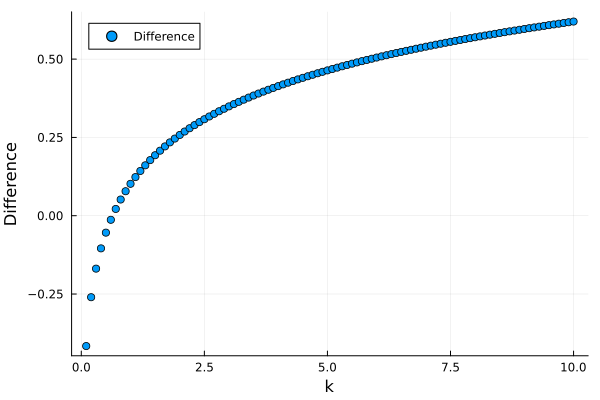

In [109]:
k = [i for i in LinRange(0.1, 10, 100)]
plot()
v_values = []
for k_value in k
    push!(v_values, v(k_value))
end
minimum_values = []
for k_value in k
    max, k_prime_optimal = minimiser(k_value)
    push!(minimum_values, max)
end
difference = minimum_values .- v_values
scatter!([k], [difference], label="Difference", xlabel="k", ylabel="Difference")

Part d

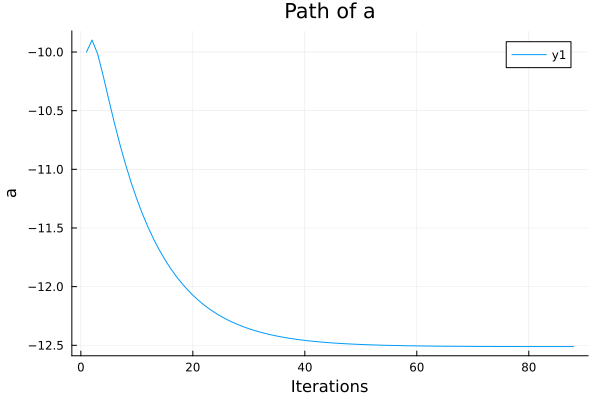

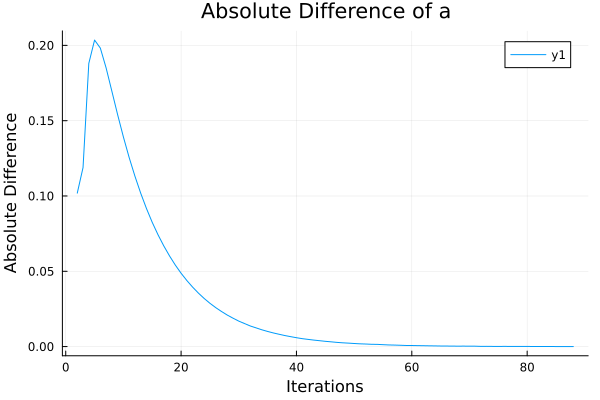

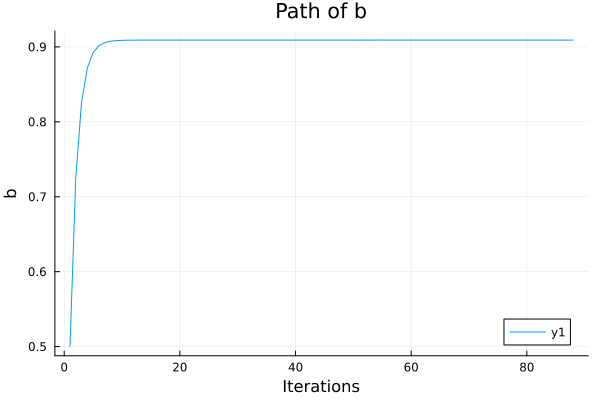

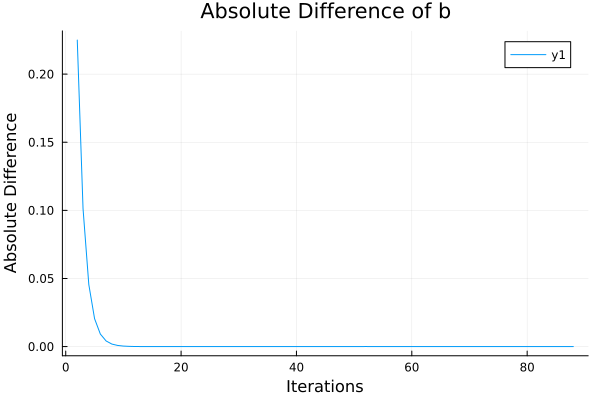

The optimal values of a and b are -12.511186039460988 and 0.909081714723006 respectively.

In [110]:
function optimization(a_0, b_0)
    k = [i for i in LinRange(0.1, 10, 5)]
    a_i = [a_0]
    b_i = [b_0]

    tolerance = 1e-10  # Increase the tolerance value for more iterations
    iteration = 1

    while true
        v_i = []
        for k_value in k
            max, _ = minimiser(k_value, a=a_i[iteration], b=b_i[iteration])
            push!(v_i, max)
        end
        
        function_to_minimise = (params) -> sum((v_i .- params[1] .- params[2] .* log.(k)).^2)

        result = optimize(function_to_minimise, [a_i[iteration], b_i[iteration]])
        push!(a_i, result.minimizer[1])
        push!(b_i, result.minimizer[2])
        
        if abs(a_i[iteration + 1] - a_i[iteration]) < tolerance && abs(b_i[iteration + 1] - b_i[iteration]) < tolerance
            break
        end
        
        iteration += 1
    end
    return a_i, b_i
end

a_0 = -10.0
b_0 = 0.5

a, b = optimization(a_0, b_0)
a_new, b_new = a[end], b[end]
print("The optimal values of a and b are $(a[end]) and $(b[end]) respectively.")

iterations = [i for i in 1:length(a)]
# Plot a
p1 = plot(iterations, a, xlabel="Iterations", ylabel="a", title="Path of a")

# Plot the absolute difference of a
p2 = plot(iterations[2:end], abs.(a[2:end] .- a[1:end-1]), xlabel="Iterations", ylabel="Absolute Difference", title="Absolute Difference of a")

# Plot b
p3 = plot(iterations, b, xlabel="Iterations", ylabel="b", title="Path of b")

# Plot the absolute difference of b
p4 = plot(iterations[2:end], abs.(b[2:end] .- b[1:end-1]), xlabel="Iterations", ylabel="Absolute Difference", title="Absolute Difference of b")


# Display each plot separately
display(p1)
display(p2)
display(p3)
display(p4)


We see that the value of b converges significantly faster than the value of a, however the final values they converge at are a=-12.5 and b=0.91 respictively. We can interpret these values as the optimum values that maximise the equation.

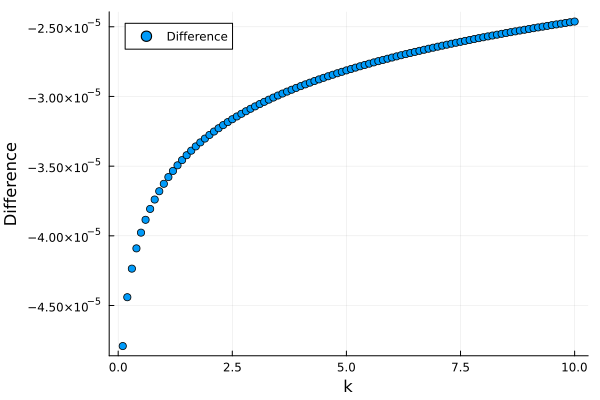

In [111]:
k = [i for i in LinRange(0.1, 10, 100)]

plot()
v_values = []
for k_value in k
    push!(v_values, v(k_value, a=a_new, b=b_new))
end
minimum_values = []
for k_value in k
    max, k_prime_optimal = minimiser(k_value, a=a_new, b=b_new)
    push!(minimum_values, max)
end
difference = minimum_values .- v_values
scatter!([k], [difference], label="Difference", xlabel="k", ylabel="Difference")

We can see that it follows the same pattern of the difference, however the actual difference is significantly smaller and unlike previously we do not change from a negative difference to a positive difference. This shows that are new values of a and b are better initial guesses to use, and we get significantly closer as k increases.